# Deteccion de valores atipicos usando el metodo de las cajas

#### Importamos las librerias necesarias

In [245]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

#### Cargamos nuestro set de datos y vemos un resumen

In [246]:
estructura_manglar = pd.read_csv('./DATA_ESTRUCTURA.csv', sep = ';')
print ('>>>DATA SET INICIAL:\n')
#print(alturas.head())
display(HTML(estructura_manglar.head().to_html())) 
print ('>>>',len(estructura_manglar),' filas\n')
estructura_manglar.info()
estructura_manglar.dropna( inplace = True ) 

ParserError: Error tokenizing data. C error: Expected 1 fields in line 973, saw 3


#### Revisamos y corregimos los tipos de datos de cada columna

In [ ]:
estructura_manglar['FECHA']=pd.to_datetime(estructura_manglar['FECHA'], format='%d/%m/%y')
# estructura_manglar['FECHA']= datetime.strptime(estructura_manglar['FECHA'],'dd/mm/yyyy')
estructura_manglar['ALTURA'] = estructura_manglar['ALTURA'].replace('[^\d]','.',regex=True).astype(float)
# estructura_manglar['ALTURA'] = estructura_manglar['ALTURA'].astype(float)    
# estructura_manglar['ALTURA'] = pd.to_numeric(estructura_manglar['ALTURA'])    
estructura_manglar['DAP'] = estructura_manglar['DAP'].replace('[^\d]','.',regex=True).astype(float)
estructura_manglar['TIPO'] = estructura_manglar['TIPO'].astype(int)       
estructura_manglar['ESTADO'] = estructura_manglar['ESTADO'].astype(int)       

estructura_manglar.info()
estructura_manglar

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10236 entries, 0 to 10253
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA         10236 non-null  datetime64[ns]
 1   ID_ESTACION   10236 non-null  int64         
 2   NOM_ESTACION  10236 non-null  object        
 3   ESPECIE       10236 non-null  object        
 4   ESPECIE_DES   10236 non-null  object        
 5   ALTURA        10236 non-null  float64       
 6   DAP           10236 non-null  float64       
 7   TIPO          10236 non-null  int32         
 8   TIPO_DES      10236 non-null  object        
 9   ESTADO        10236 non-null  int32         
 10  ESTADO_DES    10236 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(5)
memory usage: 879.7+ KB


,FECHA,ID_ESTACION,NOM_ESTACION,ESPECIE,ESPECIE_DES,ALTURA,DAP,TIPO,TIPO_DES,ESTADO,ESTADO_DES
0,2000-03-07,45907,Kilómetro 22 -1,AG,Avicennia germinans,8.9,13.0,8,Tronco,6,Vivo
1,2000-03-07,45907,Kilómetro 22 -1,AG,Avicennia germinans,5.2,6.9,8,Tronco,3,Mal Estado
2,2000-03-07,45907,Kilómetro 22 -1,AG,Avicennia germinans,10.1,15.3,8,Tronco,1,Caido
3,2000-03-07,45907,Kilómetro 22 -1,AG,Avicennia germinans,13.7,24.7,8,Tronco,6,Vivo
4,2000-03-07,45907,Kilómetro 22 -1,AG,Avicennia germinans,13.2,23.7,8,Tronco,6,Vivo
...,...,...,...,...,...,...,...,...,...,...,...
10249,2018-12-05,50093,Sevillano,AG,Avicennia germinans,3.0,4.3,7,Rama,6,Vivo
10250,2018-12-05,50093,Sevillano,AG,Avicennia germinans,10.0,11.5,7,Rama,6,Vivo
10251,2018-12-05,50093,Sevillano,AG,Avicennia germinans,3.0,7.0,8,Tronco,6,Vivo
10252,2018-12-05,50093,Sevillano,AG,Avicennia germinans,14.0,14.4,8,Tronco,6,Vivo


#### Imprimimos un histograma para ver como se distribuyen nuestros datos

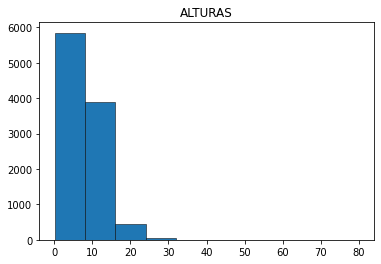

In [ ]:
plt.title('ALTURAS')
plt.hist(estructura_manglar['ALTURA'], edgecolor='black', linewidth=0.5)
plt.show()

#### Mostramos el diagrama de cajas para las alturas

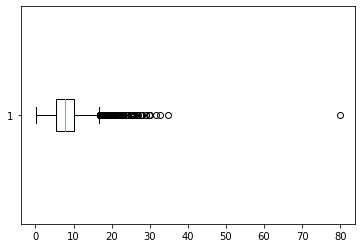

In [ ]:

plt.boxplot(estructura_manglar['ALTURA'], vert=False)
plt.show()


#### a continuacion calculamos los valores de nuestro diagrama de cajas

In [ ]:
MEDIANA = estructura_manglar['ALTURA'].median()
valor_min = estructura_manglar['ALTURA'].min()
valor_max = estructura_manglar['ALTURA'].max()
Q1 = estructura_manglar['ALTURA'].quantile(0.25)
Q3 = estructura_manglar['ALTURA'].quantile(0.75)
IQR = Q3 -Q1
f1 = Q1 - 1.5*IQR
f2 = Q3 + 1.5*IQR

if(valor_min>f1):
    f1 = valor_min

if(valor_max<f2):
    f1 = valor_max
    


print('Q1 =',Q1)
print('Q3 =',Q3)
print('MEDIANA =', MEDIANA)
print('valor_min =', valor_min)
print('valor_max =', valor_max)
print('f1 =',f1)
print('f2 =',f2)

Q1 = 5.5
Q3 = 10.0
MEDIANA = 7.7
valor_min = 0.1
valor_max = 80.0
f1 = 0.1
f2 = 16.75


#### Finalmente imprimimos los valores atipicos

In [ ]:
ubicacion_atipicos = (estructura_manglar['ALTURA']<f1) | (estructura_manglar['ALTURA']>f2)
#print('ubicacion atipicos\n', ubicacion_atipicos)
atipicos = estructura_manglar[ubicacion_atipicos]
print('valores atipicos\n',atipicos)

valores atipicos
           FECHA  ID_ESTACION     NOM_ESTACION ESPECIE            ESPECIE_DES  \
1010 2000-01-24        45920     Rinconada -3      AG    Avicennia germinans   
1017 2000-01-24        45920     Rinconada -3      AG    Avicennia germinans   
1025 2000-01-24        45920     Rinconada -3      AG    Avicennia germinans   
1039 2000-01-24        45920     Rinconada -3      AG    Avicennia germinans   
1179 2014-07-04        45907  Kilómetro 22 -1      AG    Avicennia germinans   
...         ...          ...              ...     ...                    ...   
8926 2012-12-06        47837          Luna -2      AG    Avicennia germinans   
8933 2012-12-06        47837          Luna -2      AG    Avicennia germinans   
8934 2012-12-06        47837          Luna -2      AG    Avicennia germinans   
8943 2012-12-06        47837          Luna -2      LR  Laguncularia racemosa   
8974 2012-12-06        47837          Luna -2      LR  Laguncularia racemosa   

      ALTURA    DAP  

#### creamos una funcion que realiza todo el proceso...

In [ ]:
def atipicos_by_boxplot(serie):
 
    plt.boxplot(serie, vert=False)
    plt.show()
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    f1 = Q1 - 1.5*IQR #bigote inferior
    f2 = Q3 + 1.5*IQR #bigote superior
    
    if(serie.min()>f1):
        f1 = serie.min()

    if(serie.max()<f2):
        f1 = serie.max()
        
    print('MEDIANA =', serie.median())
    print('valor_min =', serie.min())
    print('valor_max =', serie.max())
    print('Q1 =',Q1)
    print('Q3 =',Q3)
    print('IQR = ',IQR)
    
    print('f1 =',f1)    
    print('f2 =',f2)
    
    ubicacion_atipicos = (estructura_manglar['ALTURA']<f1) | (estructura_manglar['ALTURA']>f2) #guardamos la ubicacion de nuestros outliers
    #print('ubicacion atipicos\n', ubicacion_atipicos)

    atipicos = estructura_manglar[ubicacion_atipicos] #extraemos los outliers de nuestro dataframe
    # print('atipicos\n',atipicos)
    display(HTML(atipicos.head().to_html())) 
    print ('>>>',len(atipicos),' filas\n')
    print('Se encontraron:')
    print(len(atipicos),'valores atipicos')
    print(len(serie) - len(atipicos),'valores validos')
    return atipicos

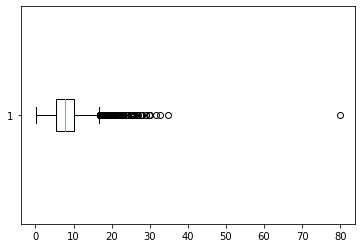

MEDIANA = 7.7
valor_min = 0.1
valor_max = 80.0
Q1 = 5.5
Q3 = 10.0
IQR =  4.5
f1 = 0.1
f2 = 16.75


,FECHA,ID_ESTACION,NOM_ESTACION,ESPECIE,ESPECIE_DES,ALTURA,DAP,TIPO,TIPO_DES,ESTADO,ESTADO_DES
1010,2000-01-24,45920,Rinconada -3,AG,Avicennia germinans,18.2,25.30,8,Tronco,6,Vivo
1017,2000-01-24,45920,Rinconada -3,AG,Avicennia germinans,17.7,29.50,8,Tronco,6,Vivo
1025,2000-01-24,45920,Rinconada -3,AG,Avicennia germinans,17.7,27.35,8,Tronco,6,Vivo
1039,2000-01-24,45920,Rinconada -3,AG,Avicennia germinans,17.7,36.60,8,Tronco,6,Vivo
1179,2014-07-04,45907,Kilómetro 22 -1,AG,Avicennia germinans,17.0,20.80,8,Tronco,6,Vivo


>>> 486  filas

Se encontraron:
486 valores atipicos
9750 valores validos


In [ ]:
outliers_altura = atipicos_by_boxplot(estructura_manglar['ALTURA'])
outliers_altura.to_csv('ALTURAS_atipicas.csv')

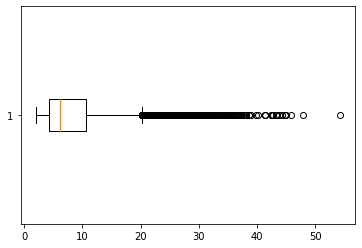

MEDIANA = 6.2
valor_min = 2.0
valor_max = 54.3
Q1 = 4.2
Q3 = 10.6
IQR =  6.3999999999999995
f1 = 2.0
f2 = 20.2


,FECHA,ID_ESTACION,NOM_ESTACION,ESPECIE,ESPECIE_DES,ALTURA,DAP,TIPO,TIPO_DES,ESTADO,ESTADO_DES
1095,2000-02-04,45924,Aguas Negras -1,LR,Laguncularia racemosa,1.6,4.1,8,Tronco,6,Vivo
1229,2014-07-04,45907,Kilómetro 22 -1,AG,Avicennia germinans,0.5,6.9,8,Tronco,1,Caido
1334,1995-11-20,45907,Kilómetro 22 -1,AG,Avicennia germinans,1.9,3.5,8,Tronco,6,Vivo
1337,1995-11-20,45907,Kilómetro 22 -1,AG,Avicennia germinans,1.8,3.5,8,Tronco,6,Vivo
1338,1995-11-20,45907,Kilómetro 22 -1,AG,Avicennia germinans,1.8,2.9,7,Rama,6,Vivo


>>> 201  filas

Se encontraron:
201 valores atipicos
10035 valores validos


In [ ]:
outliers_dap = atipicos_by_boxplot(estructura_manglar['DAP'])
outliers_dap.to_csv('DAP_atipicas.csv')

Podemos exportar nuestros valores atipicos para verlos mas comodamente en excel

In [ ]:
print(outliers_dap['DAP'].value_counts ())


3.5     4
17.0    4
3.0     4
25.5    4
3.2     3
       ..
28.9    1
35.1    1
39.8    1
29.9    1
36.8    1
Name: DAP, Length: 150, dtype: int64
20.00    125
18.00    123
17.00     53
22.00     36
25.00     31
19.00     17
23.00     16
21.00     13
26.00      9
17.70      6
24.00      5
18.70      5
19.70      4
17.50      4
18.20      3
25.70      3
29.00      2
21.50      2
27.70      2
20.70      2
17.60      2
80.00      1
19.50      1
27.00      1
22.50      1
28.00      1
22.70      1
30.00      1
32.70      1
17.20      1
23.20      1
19.20      1
23.10      1
31.60      1
34.70      1
29.70      1
18.50      1
23.70      1
26.70      1
19.45      1
17.57      1
20.20      1
20.67      1
20.03      1
Name: ALTURA, dtype: int64


In [ ]:
print(outliers_altura['ALTURA'].value_counts ())

20.00    125
18.00    123
17.00     53
22.00     36
25.00     31
19.00     17
23.00     16
21.00     13
26.00      9
17.70      6
24.00      5
18.70      5
19.70      4
17.50      4
18.20      3
25.70      3
29.00      2
21.50      2
27.70      2
20.70      2
17.60      2
80.00      1
19.50      1
27.00      1
22.50      1
28.00      1
22.70      1
30.00      1
32.70      1
17.20      1
23.20      1
19.20      1
23.10      1
31.60      1
34.70      1
29.70      1
18.50      1
23.70      1
26.70      1
19.45      1
17.57      1
20.20      1
20.67      1
20.03      1
Name: ALTURA, dtype: int64
